In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Functions

# Groups clusters of pairs of correlated stocks 
def process_pairs(pairs):
    sets = [set()]  # start with one empty set

    for a, b in pairs:
        found = False

        for s in sets:
            if a in s and b in s:
                # both elements already in the set — do nothing
                found = True
                break
            elif a in s and b not in s:
                s.add(b)
                found = True
                break
            elif b in s and a not in s:
                s.add(a)
                found = True
                break

        if not found:
            # no set contains either element — create new set with both
            sets.append({a, b})

    return sets

#---------------------------------------------------------------------------------


df = pd.read_csv("../prices.txt", header = None, delim_whitespace=True)
column_names = [f"Stock_{i}" for i in range(1, 51)]
df.columns = column_names

# pct_change_df = df.pct_change()
# df[["Stock_2", "Stock_50"]].plot()
# plt.show()

corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Create a boolean mask where abs(corr) >= 0.8
mask = (abs(corr_matrix) >= 0.9) & (abs(corr_matrix) != 1)

# Use .stack() to reshape and filter only True values
strong_corr_pairs = mask.stack()
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs]
strong_corr_list = strong_corr_pairs.index.tolist()

# # Finds all unique pairs of stocks that have this corr threshold
# filtered_pairs = []
# seen = set()

# for pair in strong_corr_list:
#     sorted_pair = tuple(sorted(pair))
    
#     if sorted_pair not in seen:
#         seen.add(sorted_pair)
#         filtered_pairs.append(pair)

# Groups stocks by correlation 
result = process_pairs(strong_corr_list)

for i, s in enumerate(result):
    print(f"Set {i}: {s}")


##### TODO #########################################
### IMPLEMENT 'getMyPosition' FUNCTION #############
### TO RUN, RUN 'eval.py' ##########################

nInst = 50
currentPos = np.zeros(nInst)


def getMyPosition(prcSoFar):
    global currentPos
    (nins, nt) = prcSoFar.shape
    if (nt < 2):
        return np.zeros(nins)
    lastRet = np.log(prcSoFar[:, -1] / prcSoFar[:, -2])
    lNorm = np.sqrt(lastRet.dot(lastRet))
    lastRet /= lNorm
    rpos = np.array([int(x) for x in 5000 * lastRet / prcSoFar[:, -1]])
    currentPos = np.array([int(x) for x in currentPos+rpos])
    return currentPos

Set 0: set()
Set 1: {'Stock_50', 'Stock_2'}
Set 2: {'Stock_5', 'Stock_23', 'Stock_7', 'Stock_3', 'Stock_21'}
Set 3: {'Stock_24', 'Stock_12'}


<ipython-input-83-ba03a0f0b2e7>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../prices.txt", header = None, delim_whitespace=True)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Functions

# Groups clusters of pairs of correlated stocks 
def process_pairs(pairs):
    sets = [set()]  # start with one empty set

    for a, b in pairs:
        found = False

        for s in sets:
            if a in s and b in s:
                # both elements already in the set — do nothing
                found = True
                break
            elif a in s and b not in s:
                s.add(b)
                found = True
                break
            elif b in s and a not in s:
                s.add(a)
                found = True
                break

        if not found:
            # no set contains either element — create new set with both
            sets.append({a, b})

    return sets

#---------------------------------------------------------------------------------


df = pd.read_csv("../prices.txt", header = None, delim_whitespace=True)
column_names = [f"Stock_{i}" for i in range(1, 51)]
df.columns = column_names

# pct_change_df = df.pct_change()
# df[["Stock_2", "Stock_50"]].plot()
# plt.show()

corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Create a boolean mask where abs(corr) >= 0.8
mask = (abs(corr_matrix) >= 0.8) & (abs(corr_matrix) != 1)

# Use .stack() to reshape and filter only True values
strong_corr_pairs = mask.stack()
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs]
strong_corr_list = strong_corr_pairs.index.tolist()

# Groups stocks by correlation 
result = process_pairs(strong_corr_list)

for i, s in enumerate(result):
    print(f"Set {i}: {s}")


##### TODO #########################################
### IMPLEMENT 'getMyPosition' FUNCTION #############
### TO RUN, RUN 'eval.py' ##########################

nInst = 50
currentPos = np.zeros(nInst)


def getMyPosition(prcSoFar):
    global currentPos
    (nins, nt) = prcSoFar.shape
    if (nt < 2):
        return np.zeros(nins)
    lastRet = np.log(prcSoFar[:, -1] / prcSoFar[:, -2])
    lNorm = np.sqrt(lastRet.dot(lastRet))
    lastRet /= lNorm
    rpos = np.array([int(x) for x in 5000 * lastRet / prcSoFar[:, -1]])
    currentPos = np.array([int(x) for x in currentPos+rpos])
    return currentPos

Set 0: set()
Set 1: {'Stock_6', 'Stock_40', 'Stock_7', 'Stock_30', 'Stock_50', 'Stock_22', 'Stock_12', 'Stock_32', 'Stock_17', 'Stock_15', 'Stock_43', 'Stock_3', 'Stock_31', 'Stock_2', 'Stock_5', 'Stock_10', 'Stock_23', 'Stock_44', 'Stock_26', 'Stock_49', 'Stock_48', 'Stock_36', 'Stock_13', 'Stock_20', 'Stock_24', 'Stock_28', 'Stock_34', 'Stock_14', 'Stock_21'}
Set 2: {'Stock_5', 'Stock_3'}
Set 3: {'Stock_32', 'Stock_31', 'Stock_6', 'Stock_15', 'Stock_28', 'Stock_22', 'Stock_10'}
Set 4: {'Stock_8', 'Stock_12', 'Stock_14'}
Set 5: {'Stock_15', 'Stock_10'}


<ipython-input-84-0cf269cc5ef2>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../prices.txt", header = None, delim_whitespace=True)


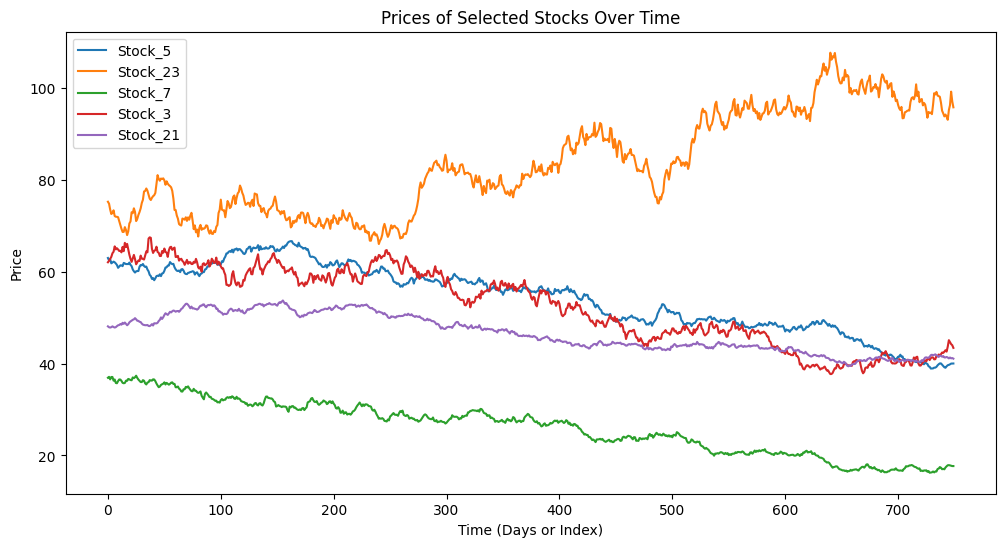

In [ ]:
import matplotlib.pyplot as plt

stocks_to_plot = ['Stock_5', 'Stock_23', 'Stock_7', 'Stock_3', 'Stock_21']

plt.figure(figsize=(12, 6))

for stock in stocks_to_plot:
    plt.plot(df[stock], label=stock)

plt.title("Prices of Selected Stocks Over Time")
plt.xlabel("Time (Days or Index)")
plt.ylabel("Price")
plt.legend()
plt.show()

